<a href="https://colab.research.google.com/github/PriyankaDodeja/Health-insurance-cross-sell-production/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Health insurance cross cell prediction/data/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
df['Response'].sum()

46710

In [ ]:
df['Response'].sum()/len(df['Response'])

0.12256336113815208

In [ ]:
df.shape

(381109, 12)

In [ ]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
'''g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()'''

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fe87413d320> (for post_execute):


KeyboardInterrupt: ignored

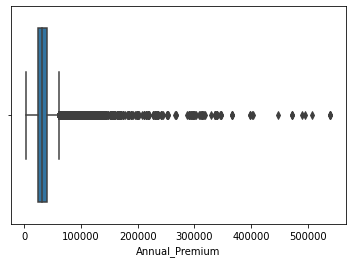

In [ ]:
sns.boxplot(x=df['Annual_Premium'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


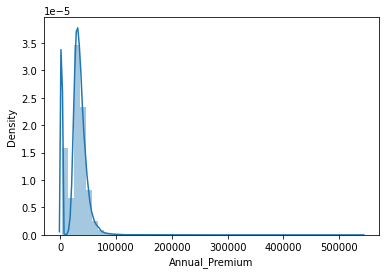

In [ ]:
sns.distplot(df['Annual_Premium'])

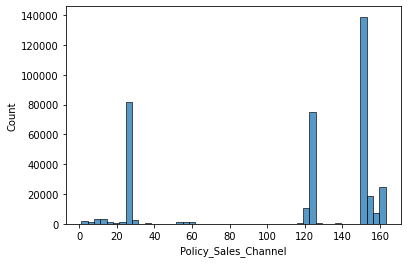

In [ ]:
sns.histplot(df['Policy_Sales_Channel'])

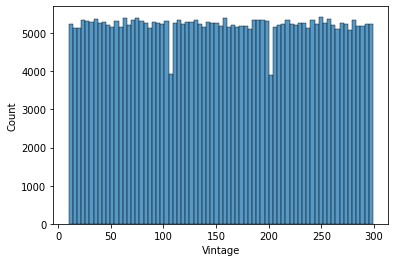

In [ ]:
sns.histplot(df['Vintage'])

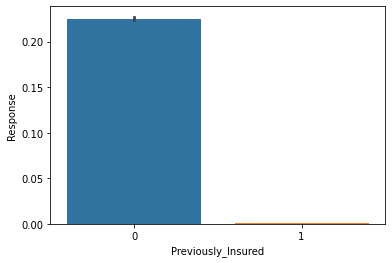

In [ ]:
sns.barplot(x='Previously_Insured', y='Response', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


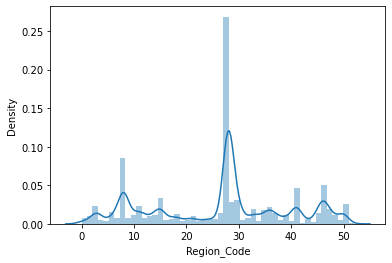

In [ ]:
sns.distplot(df['Region_Code'])

In [ ]:
len(df['Region_Code'].value_counts())

53

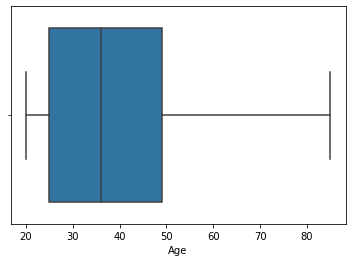

In [ ]:
sns.boxplot(x=df['Age'])

In [ ]:
#Categorize age
# 20-45, 45-65, 65 and above

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


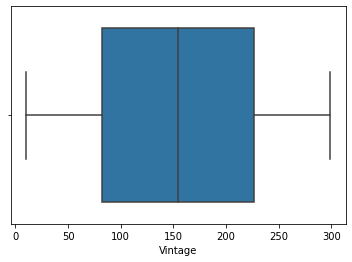

In [ ]:
sns.boxplot(df['Vintage'])

In [ ]:
df['Annual_Premium'].median()

31669.0

In [ ]:
df['Annual_Premium'].max()

540165.0

In [ ]:
df['Annual_Premium'][df['Annual_Premium']!=df['Annual_Premium'].max()].max()

508073.0

In [ ]:
(sorted(df['Annual_Premium']))[-20:]

[347606.0,
 366891.0,
 366891.0,
 366891.0,
 366891.0,
 399010.0,
 399010.0,
 402097.0,
 402863.0,
 448156.0,
 472042.0,
 472042.0,
 472042.0,
 489663.0,
 495106.0,
 508073.0,
 540165.0,
 540165.0,
 540165.0,
 540165.0]

In [ ]:
Q1=df['Annual_Premium'].quantile(0.25)
Q3=df['Annual_Premium'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

24405.0
39400.0
14995.0
1912.5 61892.5


In [ ]:
df['Annual_Premium'][df['Annual_Premium']>Upper_Whisker]

25         61964.0
37         76251.0
67         66338.0
139        62164.0
149        76651.0
            ...   
380959     61909.0
380998    101664.0
381035     62889.0
381047     71915.0
381079     69845.0
Name: Annual_Premium, Length: 10320, dtype: float64

In [ ]:


len(df['Annual_Premium'][df['Annual_Premium']>Upper_Whisker])

10320

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


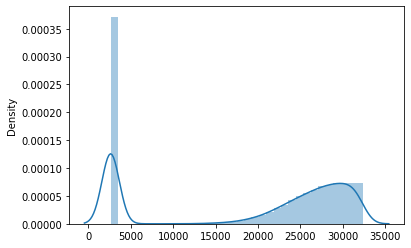

In [ ]:
sns.distplot(sorted(df['Annual_Premium'])[:200000])

In [ ]:
df['Vehical_Age_Category'] = df['Vehicle_Age'].apply(lambda x:2 if x=='> 2 Years' else 1 if x=='1-2 Year' else 0)
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehical_Age_Category
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,2
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,1
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,2
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,0


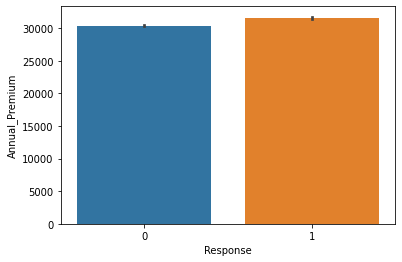

In [ ]:
sns.barplot(x='Response', y='Annual_Premium',data=df)

In [ ]:
df['Annual_Premium_Treated'] = np.where(df['Annual_Premium']>Upper_Whisker, Upper_Whisker, df['Annual_Premium'])
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehical_Age_Category,Annual_Premium_Treated
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,2,40454.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,1,33536.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,2,38294.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0,28619.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,0,27496.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


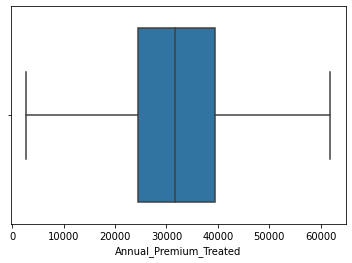

In [ ]:
sns.boxplot(df['Annual_Premium_Treated'])

In [ ]:
numeric_columns = ['Age','Annual_Premium_Treated','Policy_Sales_Channel','Vintage']
numeric_columns_scaled = ['Age_scaled','Annual_Premium_Treated_scaled','Policy_Sales_Channel_scaled','Vintage_scaled']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
for i,j in zip(numeric_columns,numeric_columns_scaled):
  df[j] = pd.DataFrame(scaler.fit_transform((df[i]).values.reshape(-1, 1)), columns=[i])

df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehical_Age_Category,Annual_Premium_Treated,Age_scaled,Annual_Premium_Treated_scaled,Policy_Sales_Channel_scaled,Vintage_scaled
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,2,40454.0,0.369231,0.638245,0.154321,0.716263
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,1,33536.0,0.861538,0.521510,0.154321,0.598616
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,2,38294.0,0.415385,0.601797,0.154321,0.058824
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0,28619.0,0.015385,0.438540,0.932099,0.667820
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,0,27496.0,0.138462,0.419591,0.932099,0.100346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0,1,30170.0,0.830769,0.464712,0.154321,0.269896
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0,0,40016.0,0.153846,0.630854,0.932099,0.418685
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0,0,35118.0,0.015385,0.548205,0.981481,0.522491
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0,2,44617.0,0.738462,0.708492,0.759259,0.221453


In [ ]:
df['Age_Category'] = df['Age'].apply(lambda x:1 if 45>=x>=20 else 2 if 65>=x>45 else 3)

In [ ]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehical_Age_Category,Annual_Premium_Treated,Age_scaled,Annual_Premium_Treated_scaled,Policy_Sales_Channel_scaled,Vintage_scaled,Age_Category
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,2,40454.0,0.369231,0.638245,0.154321,0.716263,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,1,33536.0,0.861538,0.521510,0.154321,0.598616,3
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,2,38294.0,0.415385,0.601797,0.154321,0.058824,2
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0,28619.0,0.015385,0.438540,0.932099,0.667820,1
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,0,27496.0,0.138462,0.419591,0.932099,0.100346,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0,1,30170.0,0.830769,0.464712,0.154321,0.269896,3
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0,0,40016.0,0.153846,0.630854,0.932099,0.418685,1
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0,0,35118.0,0.015385,0.548205,0.981481,0.522491,1
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0,2,44617.0,0.738462,0.708492,0.759259,0.221453,3


In [ ]:
df['Policy_Sales_Channel'].value_counts()

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
144.0         1
149.0         1
84.0          1
143.0         1
43.0          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


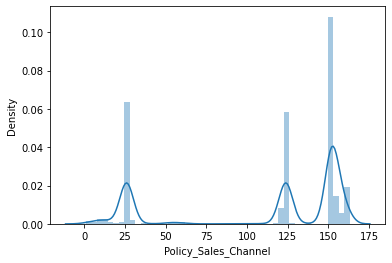

In [ ]:
sns.distplot(df['Policy_Sales_Channel'])

In [ ]:
df['Vintage'].unique()

array([217, 183,  27, 203,  39, 176, 249,  72,  28,  80,  46, 289, 221,
        15,  58, 147, 256, 299, 158, 102, 116, 177, 232,  60, 180,  49,
        57, 223, 136, 222, 149, 169,  88, 253, 107, 264, 233,  45, 184,
       251, 153, 186,  71,  34,  83,  12, 246, 141, 216, 130, 282,  73,
       171, 283, 295, 165,  30, 218,  22,  36,  79,  81, 100,  63, 242,
       277,  61, 111, 167,  74, 235, 131, 243, 248, 114, 281,  62, 189,
       139, 138, 209, 254, 291,  68,  92,  52,  78, 156, 247, 275,  77,
       181, 229, 166,  16,  23,  31, 293, 219,  50, 155,  66, 260,  19,
       258, 117, 193, 204, 212, 144, 234, 206, 228, 125,  29,  18,  84,
       230,  54, 123, 101,  86,  13, 237,  85,  98,  67, 128,  95,  89,
        99, 208, 134, 135, 268, 284, 119, 226, 105, 142, 207, 272, 263,
        64,  40, 245, 163,  24, 265, 202, 259,  91, 106, 190, 162,  33,
       194, 287, 292,  69, 239, 132, 255, 152, 121, 150, 143, 198, 103,
       127, 285, 214, 151, 199,  56,  59, 215, 104, 238, 120,  2

In [ ]:
df['Vintage'].value_counts() #no. of weeks/months/years me convert krte h

256    1418
73     1410
282    1397
158    1394
187    1392
       ... 
205    1235
89     1234
32     1230
224    1227
277    1226
Name: Vintage, Length: 290, dtype: int64

In [ ]:
#df_norm.plot(kind='bar')

In [ ]:
# categorize Age, remove driving license

In [ ]:
'''Task-
1. Vehical damage - 0,1
2.Policy sales channel - categorical
3.Annual_Premium, Vintage -Standardize
4. Region_code-convert to string/int
5.categorize Age
6.remove driving license
7.drop vehical age
8. categorize policy channel
'''

SyntaxError: ignored